### DataSet 2

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


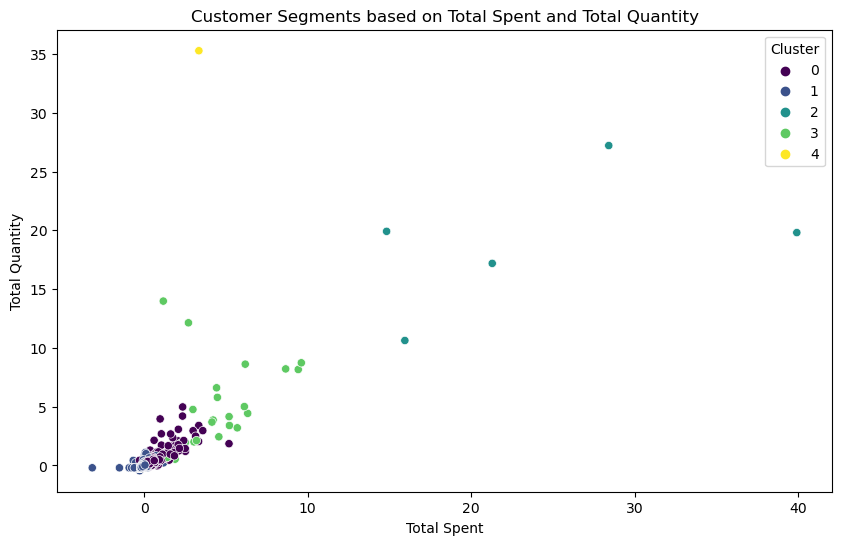

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83507

    accuracy                           1.00     83507
   macro avg       1.00      1.00      1.00     83507
weighted avg       1.00      1.00      1.00     83507

   Cluster  Sentiment
0        0        0.0
1        1        0.0
2        2        0.0
3        3        0.0
4        4        0.0


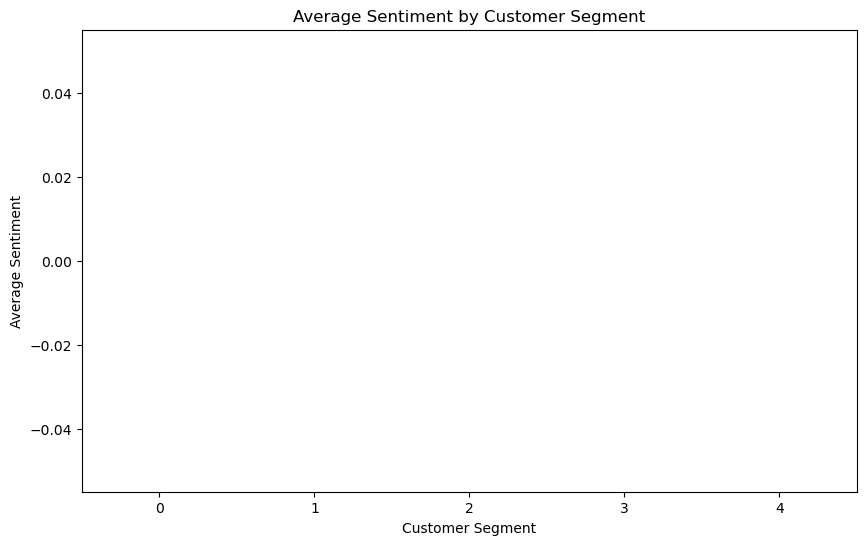

In [16]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_excel('Online.xlsx')

# Data Preprocessing
# Drop rows with missing CustomerID
df.dropna(subset=['Customer ID'], inplace=True)

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['Price']

# Extract relevant features for customer segmentation
customer_df = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',
    'Quantity': 'sum',
    'TotalPrice': 'sum'
}).reset_index()

customer_df.columns = ['CustomerID', 'NumPurchases', 'TotalQuantity', 'TotalSpent']

# Normalize the features
scaler = StandardScaler()
customer_df[['NumPurchases', 'TotalQuantity', 'TotalSpent']] = scaler.fit_transform(
    customer_df[['NumPurchases', 'TotalQuantity', 'TotalSpent']]
)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_df[['NumPurchases', 'TotalQuantity', 'TotalSpent']])

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_df, x='TotalSpent', y='TotalQuantity', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Total Spent and Total Quantity')
plt.xlabel('Total Spent')
plt.ylabel('Total Quantity')
plt.show()

# Sentiment Analysis on Product Descriptions
# Preprocess text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word.lower() for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['CleanedDescription'] = df['Description'].apply(preprocess_text)

# Convert text data to features
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['CleanedDescription']).toarray()

# Dummy sentiment labels (for demonstration purposes)
# In a real scenario, you would have a labeled dataset for sentiment analysis
df['Sentiment'] = np.where(df['Description'].str.contains('good|excellent|amazing'), 1, 0)

y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and evaluate the sentiment analysis model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Integration and Analysis
customer_segments = customer_df[['CustomerID', 'Cluster']]
df = df.merge(customer_segments, left_on='Customer ID', right_on='CustomerID', how='left')

# Analyze the results
segment_sentiment = df.groupby('Cluster')['Sentiment'].mean().reset_index()
print(segment_sentiment)

# Visualization


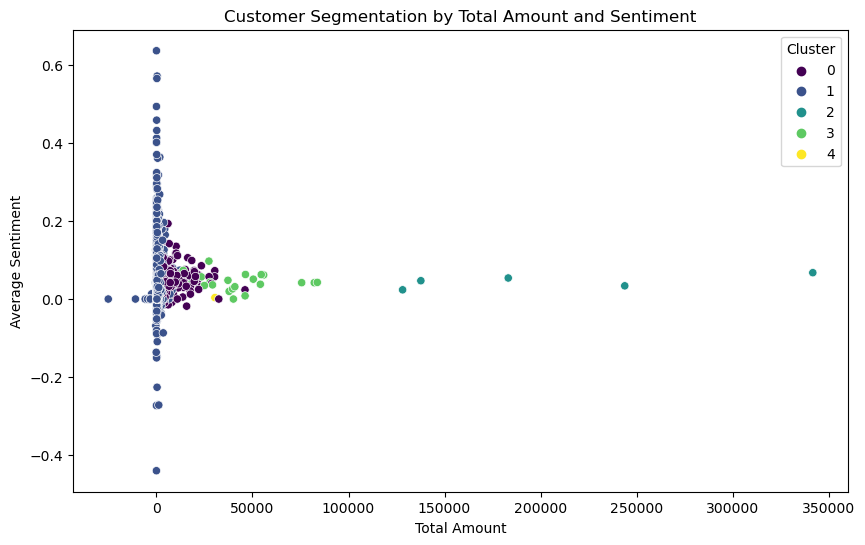

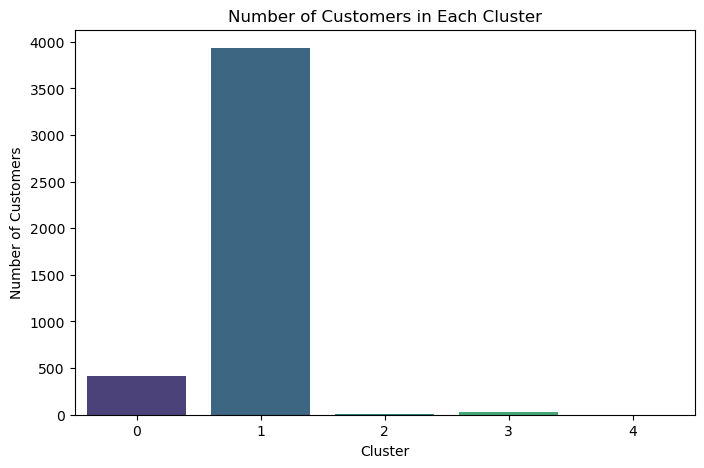

In [17]:
# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='AvgSentiment', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segmentation by Total Amount and Sentiment')
plt.xlabel('Total Amount')
plt.ylabel('Average Sentiment')
plt.legend(title='Cluster')
plt.show()

# Visualizing the number of customers in each cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=customer_data, palette='viridis')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


###  DataSet 2

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


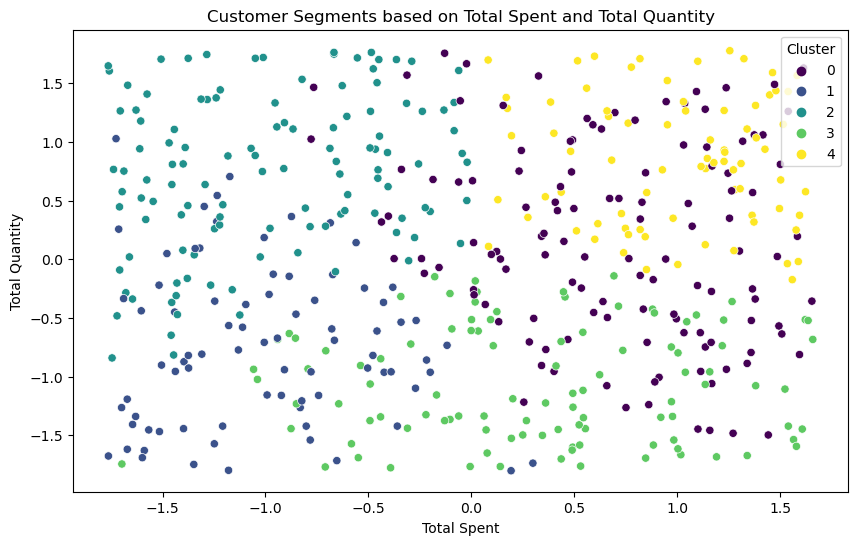

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       174
           1       1.00      1.00      1.00        26

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

   Cluster  Sentiment
0        0   0.096154
1        1   0.090278
2        2   0.081197
3        3   0.133663
4        4   0.087500


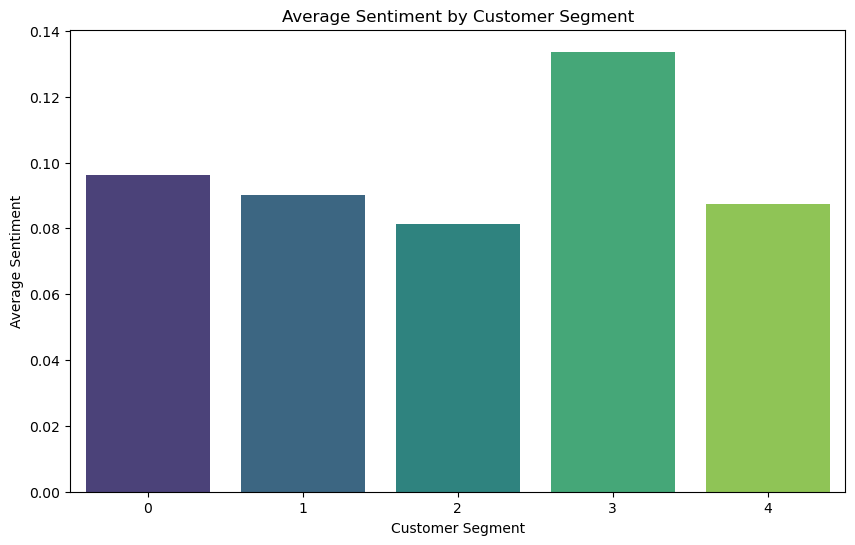

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import random

# Generate synthetic data for customer segmentation
num_customers = 500
data = {
    'CustomerID': np.arange(1, num_customers + 1),
    'NumPurchases': np.random.randint(1, 100, num_customers),
    'TotalQuantity': np.random.randint(1, 1000, num_customers),
    'TotalSpent': np.random.uniform(10.0, 10000.0, num_customers)
}

customer_df = pd.DataFrame(data)

# Normalize the features
scaler = StandardScaler()
customer_df[['NumPurchases', 'TotalQuantity', 'TotalSpent']] = scaler.fit_transform(
    customer_df[['NumPurchases', 'TotalQuantity', 'TotalSpent']]
)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(customer_df[['NumPurchases', 'TotalQuantity', 'TotalSpent']])

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_df, x='TotalSpent', y='TotalQuantity', hue='Cluster', palette='viridis')
plt.title('Customer Segments based on Total Spent and Total Quantity')
plt.xlabel('Total Spent')
plt.ylabel('Total Quantity')
plt.show()

# Generate synthetic data for product descriptions
num_descriptions = 1000
descriptions = [
    'This product is excellent and amazing!',
    'Good value for money.',
    'Not bad, but could be better.',
    'Terrible quality, very disappointing.',
    'Great product, will buy again.',
    'Awful experience, do not recommend.',
    'Satisfactory but not exceptional.',
    'Outstanding performance and quality.',
    'Poorly made, not worth the price.',
    'Fantastic item, highly recommend!'
]

data = {
    'CustomerID': np.random.choice(customer_df['CustomerID'], num_descriptions),
    'Description': np.random.choice(descriptions, num_descriptions)
}

df = pd.DataFrame(data)

# Preprocess text data
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word.lower() for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['CleanedDescription'] = df['Description'].apply(preprocess_text)

# Convert text data to features
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['CleanedDescription']).toarray()

# Create synthetic sentiment labels
df['Sentiment'] = df['Description'].apply(
    lambda x: 1 if 'excellent' in x or 'amazing' in x or 'good' in x or 'great' in x or 'fantastic' in x else 0
)

y = df['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and evaluate the sentiment analysis model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Integration and Analysis
customer_segments = customer_df[['CustomerID', 'Cluster']]
df = df.merge(customer_segments, on='CustomerID', how='left')

# Analyze the results
segment_sentiment = df.groupby('Cluster')['Sentiment'].mean().reset_index()
print(segment_sentiment)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_sentiment, x='Cluster', y='Sentiment', palette='viridis')
plt.title('Average Sentiment by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sentiment')
plt.show()
